Antes de tudo temos que importar uma biblioteca chamada <b>Pandas</b>, ela é específica para trabalharmos com DataFrames (que são os dados organizados como uma tabela de Excel, por exemplo)

In [1]:
import pandas as pd
import numpy as np
#import squarify  # lib para o TreeMap

Depois de importado a biblioteca Pandas, indicamos onde está o arquivo que queremos trabalhar, no caso, é um endereço na internet, logo, temos que atribuir esse endereço em uma variável, no caso, chamei ela de "caminho".

Depois, criamos outra variável e acionamos a biblioteca Pandas para fazer a leitura desse arquivo (que está no formato .csv (valores separados por vírgula), esse formato pode ser diverso: html, .json, pdf).

Após fazer a leitura, pedimos para exibir somente as 5 primeiras linhas desse DataFrame com o comando .head() - que é o cabeçalho do DataFrame.

In [2]:
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(caminho)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Uma boa prática para saber como está o DataFrame, além da visualização dele como foi feita acima, podemos usar o comando .info(), que mostra como estão gravados os registros e em quais formatos eles se encontram.

Note na tabela abaixo que a tabela "Valor" possui Dtype = object. Com esse formato não conseguimos realizar operações matemáticas.

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [4]:
dados.Valor # Aqui é uma forma de exibir somente a coluna Valor e, quando exibimos uma única coluna chamamos ela de Serie. Duas ou mais colunas é um DataFrame.

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

A visualização padrão do DataFrame exibe as primeiras e as últimas linhas dos registros, note que o arquivo possui 10.008 registros (começa com o registro 0)

In [5]:
dados.Valor[10006] # Aqui estou chamando somente o registro numero 10.006, pois, na consulta acima ele mostra que está registrado diferente:

'R$ 2.200\n                      /Mês'

# Tratamento e Limpeza dos Dados:

<hr>

Para execução dos cálculos aritméticos é mandatório transformar os registros em valores numéricos e, antes de fazer isso, temos que remover todas as interferências para essa conversão, no caso, temos que remover o R cifrão (tem um espaço depois do $), temos que remover os pontos de milhares (.) e por fim, tratar os registros que adicionaram informações à mais do que os números, no exemplo do registro 10.006, além do 2.200, foi registrado "\n            /Mês".

In [6]:
dados["Valor"] = dados["Valor"].str.replace("R$ ","", regex=False) # Aqui removemos o R$ e o espaço a frente dele

In [7]:
dados.Valor = dados.Valor.str.replace(".", "", regex=False) # Aqui removemos os pontos de milhares (.)

In [8]:
dados.Valor.sample(30) # Aqui fazemos uma amostragem de 30 elementos para ver a formatação

2262                              3000000
4217                              2700000
9613                              3300000
2802                              3210000
9024                               680000
5142                               997000
347                               3150000
8157                              1200000
4145                              1500000
8183                              3850000
9662                               720001
183                               1490000
747                               4800000
2399                              1700000
1333                              4000000
4513    17000\n                      /Mês
5519                              1500000
2458                              4950000
4972                              6000000
5249    20000\n                      /Mês
7461                              1170000
3470                               399000
8482                               690000
3640                              

In [9]:
dados.Valor = dados.Valor.str.replace("\n                      /Mês","", regex=False) # aqui removemos a string (texto) "\n                      /Mês"

In [10]:
dados.Valor = dados.Valor.str.replace("\n                      /Ano","", regex=False) # aqui removemos a string (texto) "\n                      /Ano"

In [11]:
dados.Valor = dados.Valor.str.replace("\n                      /Dia","", regex=False) # aqui removemos a string (texto) "\n                      /Dia"

In [12]:
dados.Valor = dados.Valor.astype(float) # Finalmente convertemos a coluna Valor de object para o formato Float (número decimal)

In [13]:
dados.info() # Após a conversão checamos o DataFrame com o comando .info() e verificamos que a coluna "Valor" agora é do tipo Float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6574 non-null   object 
 1   Bairro     9996 non-null   object 
 2   Cidade     10008 non-null  object 
 3   Metragem   10008 non-null  int64  
 4   Quartos    10008 non-null  int64  
 5   Banheiros  10008 non-null  int64  
 6   Vagas      10008 non-null  int64  
 7   Valor      10008 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 625.6+ KB


In [14]:
#dados2 = dados.copy()

In [15]:
#dados2.drop(dados2.loc[dados2['Bairro']=='nan'].index, inplace=True)

In [16]:
#sum(dados2.Bairro == 'nan')

In [17]:
#sum(dados.Bairro == 'nan')

In [18]:
#dados2.Bairro.unique()

In [19]:
dados.Valor.min() # Aqui checamos o menor valor

1650.0

In [20]:
dados.Valor.max() # AQui checamos o maior valor

65000000.0

In [21]:
dados.Valor.mean() # E finalmente realizamos a média dos valores da coluna "Valor"

2794169.56205036

In [22]:
dados["Bairro"] = dados["Bairro"].apply(lambda x:str(x).replace("Vila Água Funda", "Água Funda")) # renomeando o bairro 'Vila Água Funda' para 'Água Funda'

In [23]:
b = dados.Bairro.str.startswith('Jardim Trememb')

dados.Bairro[b] # Dois registros como Jardim Tremembe (sem acento) e 01 registro como Jardim Tremembé

1427    Jardim Tremembé
8453    Jardim Tremembe
9651    Jardim Tremembe
Name: Bairro, dtype: object

In [24]:
c = dados.Bairro.str.startswith('Trememb')

dados.Bairro[c] # 19 registros como Bairro Tremembé

51      Tremembé
310     Tremembé
1783    Tremembé
5315    Tremembé
6022    Tremembé
6087    Tremembé
6173    Tremembé
7756    Tremembé
8105    Tremembé
8292    Tremembé
8592    Tremembé
8845    Tremembé
8969    Tremembé
9066    Tremembé
9097    Tremembé
9200    Tremembé
9568    Tremembé
9695    Tremembé
9731    Tremembé
Name: Bairro, dtype: object

In [25]:
d = dados.Bairro.str.fullmatch('Vila Nova Caledônia')

dados.Bairro[d] # Cinco registros como Vila Nova Caledônia (com acento)

5303    Vila Nova Caledônia
5772    Vila Nova Caledônia
7752    Vila Nova Caledônia
7885    Vila Nova Caledônia
8588    Vila Nova Caledônia
Name: Bairro, dtype: object

In [26]:
e = dados.Bairro.str.fullmatch('Vila Nova Caledonia')

dados.Bairro[e] # Dois registros como Vila Nova Caledonia (sem acento) 

2286    Vila Nova Caledonia
2412    Vila Nova Caledonia
Name: Bairro, dtype: object

In [27]:
bairros_vazios = dados.Bairro == 'nan' # Observado que existem 12 registros sem o nome do Bairro

dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",nan,São Paulo,742,4,8,6,9800.0
7956,Rua Vergueiro,nan,São Paulo,103,3,2,2,640000.0
7996,"Rua Alvorada do Sul, 3773",nan,São Paulo,678,4,8,8,6895000.0
8126,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,550,3,5,6,4000000.0
8566,"Avenida Comendador Adibo Ares, 3773",nan,São Paulo,694,4,6,6,3890000.0
8619,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8739,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8868,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0
8943,"Rua Santo Eufredo, 3773",nan,São Paulo,846,4,8,8,30000.0
8992,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0


<hr>

#DESAFIOS AULA 01:

1 - Realizar a média da metragem para cada um dos bairros

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max

5 - Descobrir quais são os bairros que não tem nome de Rua.

<hr>

In [28]:
dados.Metragem.mean() # Checando a Média geral

442.30065947242207

In [29]:
dados.groupby('Bairro').mean()['Metragem'].to_frame().reset_index() # Média das Metragens agrupadas por Bairro 

,Bairro,Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,nan,621.333333
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,148.428571


<hr>

In [30]:
nome_do_bairro = 'Mooca' # Atribuindo o nome do bairro que se deseja realizar as consultas (válido para os dois métodos abaixo:)

In [31]:
# Método 1: utilizando o Método LOC do Pandas:

dados.loc[dados['Bairro'] == nome_do_bairro].head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0
109,Rua Timbó,Mooca,São Paulo,170,3,2,2,940000.0
247,NaN,Mooca,São Paulo,80,2,2,4,870000.0
2343,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,450000.0
2441,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,1000000.0


In [32]:
# Método 2: Através do Método Query do Pandas

dados.query('Bairro == @nome_do_bairro ').head() # O @ atribui a string a uma variável existente, no caso a variável nome_do_bairro

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0
109,Rua Timbó,Mooca,São Paulo,170,3,2,2,940000.0
247,NaN,Mooca,São Paulo,80,2,2,4,870000.0
2343,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,450000.0
2441,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,1000000.0


<hr>

<b>DESAFIO # 3</b>

 Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão


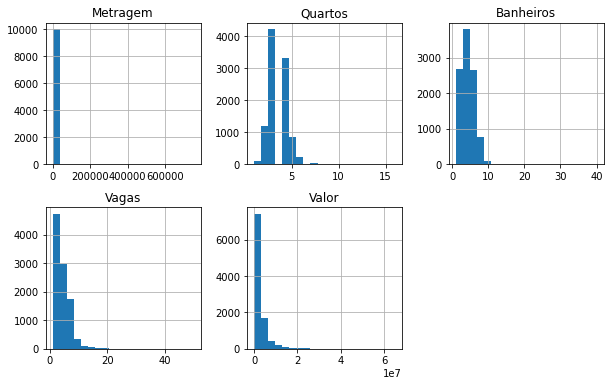

In [33]:
dados.hist(figsize=(10,6), layout=(2,3), bins=20)
print()

In [34]:
import seaborn as sns # importando a biblioteca gráfica Seaborn

sns.set_theme(style="darkgrid")

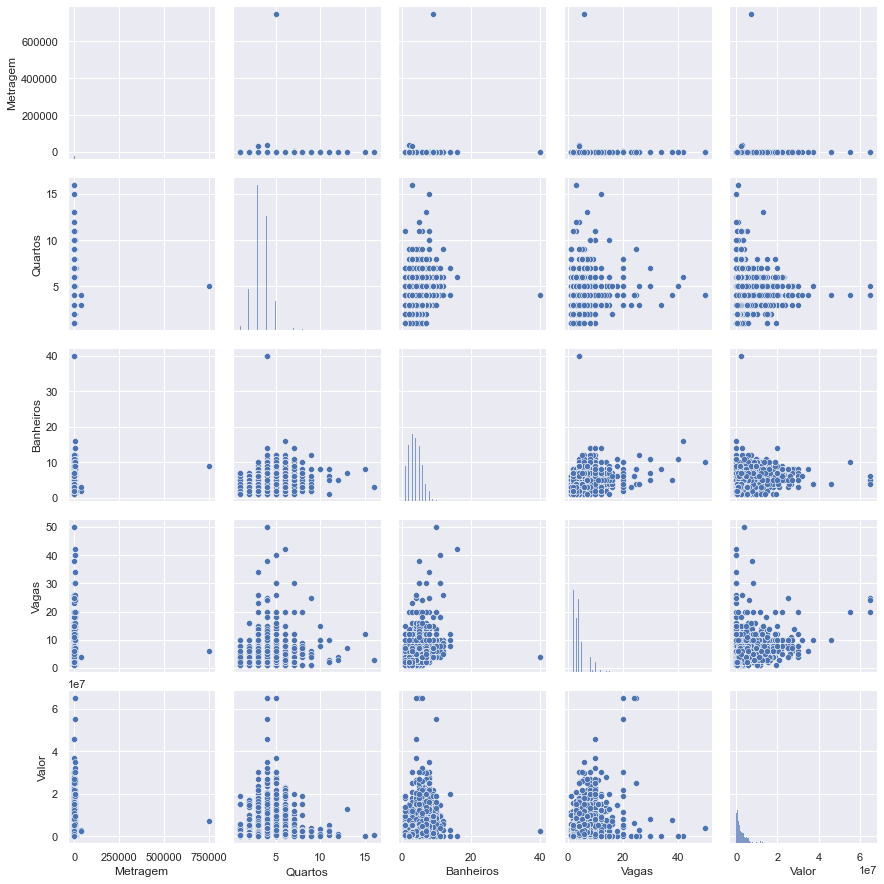

In [35]:
# Gráfico Pairplot do Seaborn - faz a comparação entre pares do dataset

ax = sns.pairplot(dados) # exibe um gráfico de comparação de pares

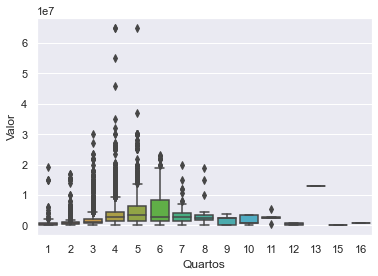

In [36]:
# Gráfico BoxPlot do Seaborn - excelente para visualizar os Outliers em uma distribuição

ax = sns.boxplot(data=dados, x='Quartos', y='Valor')

ax = sns.set(rc = {'figure.figsize':(15,10)})

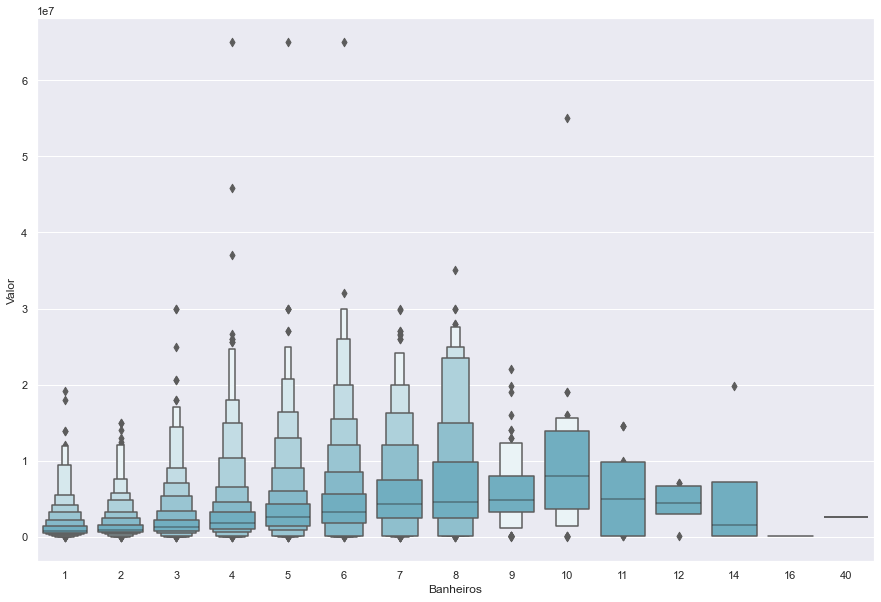

In [37]:
ax = sns.boxenplot(x="Banheiros", y="Valor",color="c",scale="linear", data=dados)

ax = sns.set(rc = {'figure.figsize':(15,6)})

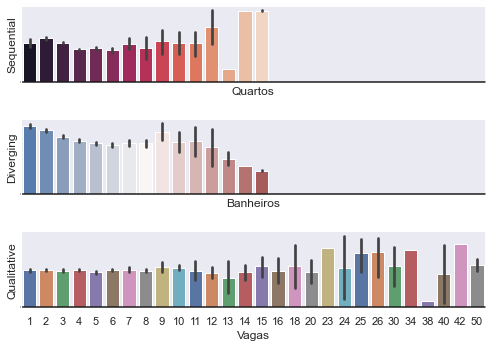

In [38]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

rs = np.random.RandomState(8)


y1 = np.arange(1,10009)
sns.barplot(x=dados.Quartos, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

y2 = y1 - 5.5
sns.barplot(x=dados.Banheiros, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=dados.Vagas, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

<hr>

<b>DESAFIO # 4</b>

 Pegar outros estatísticas dos dados, média, mediana, mim, max

In [39]:
dados.describe().T # Obtendo a contagem dos dados, média, desvio-padrão, quartis, mediana, valor mínimo e máximo:

,count,mean,std,min,25%,50%,75%,max
Metragem,10008.0,4.423007e+02,7.515379e+03,10.0,173.0,290.0,460.25,750000.0
Quartos,10008.0,3.483114e+00,1.064200e+00,1.0,3.0,3.0,4.00,16.0
Banheiros,10008.0,3.879097e+00,1.988467e+00,1.0,2.0,4.0,5.00,40.0
Vagas,10008.0,4.097222e+00,2.824014e+00,1.0,2.0,4.0,5.00,50.0
Valor,10008.0,2.794170e+06,3.866249e+06,1650.0,750000.0,1600000.0,3350000.00,65000000.0


<hr>

<b>DESAFIO # 5</b>

Descobrir quais são os bairros que não tem nome de Rua.

In [40]:
ruas_sem_nome = dados.Rua.isnull() # localizando as ruas que estão sem nome (campos vazios ou NAN)

In [41]:
dados['Bairro'][ruas_sem_nome].to_frame() # filtrando os nomes dos Bairros que possuem ruas sem nome

,Bairro
3,Jardim Morumbi
11,Jardim Luzitânia
31,Parque da Lapa
56,Chácara Santo Antônio (Zona Sul)
57,Jardim Guedala
...,...
9963,Jardim Petrópolis
9989,Parque Alves de Lima
9991,Vila Formosa
9995,Jardim Leonor


# DESAFIO AULA 02

1 - Criar uma escala de valores em milhões

2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

3 - Preço do metro quadrado por bairro e plotar em um gráfico ideal

4 - Explorar as bibliotecas de visualizações e colocar as suas conclusão

5 - Pesquisar um visualização para analisar os quartis, mediana e outliers

<hr>

<b>Desafio # 1</b>

Criar uma escala de valores em milhões

In [42]:
dados["Valor_milhoes"] = dados.Valor/1000000

In [43]:
dados['Valor_milhoes'].sample(5)

4685    1.350
6171    0.850
4016    0.024
6894    0.400
7047    2.300
Name: Valor_milhoes, dtype: float64

In [44]:
# Setando a precisão dos cálculos (número de casas decimais)

pd.set_option('display.precision', 2) # números em geral
pd.set_option('display.float_format', lambda x: '%.2f' %x) # precisão dos números tipo float

In [45]:
dados.describe(include='all').T # Checando os dados com o Describe incluindo as variáveis não numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rua,6574,3130,Rua Alberto Faria,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bairro,10008,701,Alto de Pinheiros,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cidade,10008,1,São Paulo,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metragem,10008.00,NaN,NaN,NaN,442.30,7515.38,10.00,173.00,290.00,460.25,750000.00
Quartos,10008.00,NaN,NaN,NaN,3.48,1.06,1.00,3.00,3.00,4.00,16.00
Banheiros,10008.00,NaN,NaN,NaN,3.88,1.99,1.00,2.00,4.00,5.00,40.00
Vagas,10008.00,NaN,NaN,NaN,4.10,2.82,1.00,2.00,4.00,5.00,50.00
Valor,10008.00,NaN,NaN,NaN,2794169.56,3866248.54,1650.00,750000.00,1600000.00,3350000.00,65000000.00
Valor_milhoes,10008.00,NaN,NaN,NaN,2.79,3.87,0.00,0.75,1.60,3.35,65.00


<hr>

<b>Desafio # 2</b>

Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)



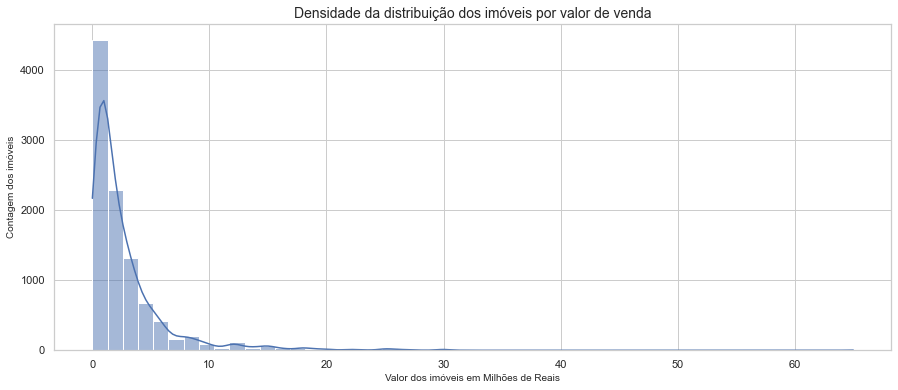

In [46]:
sns.set_style('whitegrid')
sns.histplot(data=dados, x='Valor_milhoes', bins = 50, kde = True)
plt.xlabel('Valor dos imóveis em Milhões de Reais', fontsize=10)
plt.ylabel('Contagem dos imóveis', fontsize=10)
plt.title('Densidade da distribuição dos imóveis por valor de venda', fontsize=14)
print()

<hr>

<b>Desafio # 3</b>

Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [47]:
dados['Preco_m_quadrado'] = dados.Valor/dados.Metragem

preco_metro_quadrado_bairro = dados.groupby('Bairro')['Preco_m_quadrado'].mean().head(20).reset_index()

metro_quadrado_por_bairro = preco_metro_quadrado_bairro.sort_values(by='Preco_m_quadrado', ascending=False)

metro_quadrado_por_bairro

,Bairro,Preco_m_quadrado
4,Alto de Pinheiros,10172.23
18,Brooklin Novo,9884.44
12,Boaçava,9039.68
2,Alto da Lapa,7078.57
17,Brooklin,7021.03
0,Aclimação,6875.85
19,Brooklin Paulista,6591.02
9,Bela Aliança,6203.09
7,Barra Funda,6173.43
15,Bosque da Saúde,6024.42


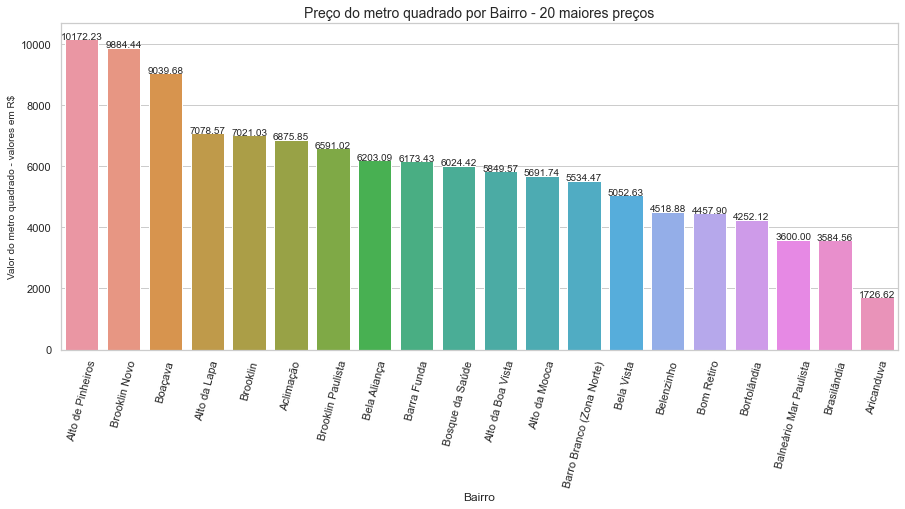

In [48]:
# Plotando um gráfico de barras com 20 valores do metro quadrado por bairro:

ax = sns.barplot(data=metro_quadrado_por_bairro, x='Bairro', y='Preco_m_quadrado')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.title('Preço do metro quadrado por Bairro - 20 maiores preços', fontsize=14)
plt.ylabel('Valor do metro quadrado - valores em R$', fontsize=10)

# Para adicionar o rótulo em cima das colunas exibindo valor:

for rotulo in ax.patches:
  height = rotulo.get_height()
  ax.text(rotulo.get_x()+rotulo.get_width()/2.,height + 3,'{:1.2f}'.format((height)),ha='center', fontsize=10)


print()

### Avaliação: Os valores estão coerentes com a localização dos imóveis, sendo os valores mais altos em áreas nobres da capital paulita.

<b>Desafio # 4:</b>

Explorar as bibliotecas de visualizações e colocar as suas conclusão

In [49]:
# Plotando um TreeMap:

# squarify.plot(sizes=metro_quadrado_por_bairro['Preco_m_quadrado'], label=metro_quadrado_por_bairro['Bairro'], alpha=.9 )
# plt.axis('off')
# plt.show()

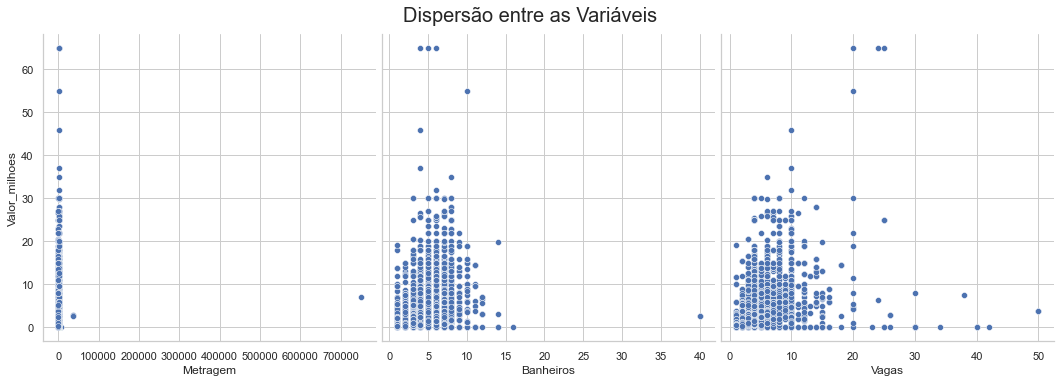

In [50]:
# Plotando um gráfico de comparação entre as variáveis do dataset:

ax = sns.pairplot(dados, y_vars='Valor_milhoes', x_vars=['Metragem', 'Banheiros', 'Vagas'], height=5)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

print()

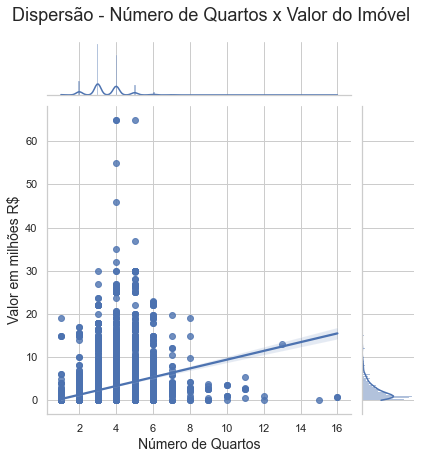

In [51]:
# Mais uma opção de visualização da Dispersão entre duas variáveis, o gráfico Jointplot do Seaborn

ax = sns.jointplot(x='Quartos', y='Valor_milhoes', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Número de Quartos x Valor do Imóvel', fontsize=18, y = 1.05)
ax.set_axis_labels('Número de Quartos', 'Valor em milhões R$', fontsize=14)
ax
print()

<hr>

<b>Desafio # 5</b>

Pesquisar um visualização para analisar os quartis, mediana e outliers

<img src="https://www.alura.com.br/artigos/assets/boxplot/imagem-2.png">

In [52]:
numericos = dados[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_milhoes', 'Preco_m_quadrado']]

In [53]:
# Primeiro calculamos as medidas separatrizes para segregar os Outliers:

Q1_dados = numericos.quantile(.25)
Q3_dados = numericos.quantile(.75)
IIQ_dados = Q3_dados-Q1_dados
limite_inferior_dados = Q1_dados - 1.5 * IIQ_dados
limite_superior_dados = Q3_dados + 1.5 * IIQ_dados

In [54]:
# De posso das medidas separatrizes filtramos o dataset para eliminar os Outliers:

selecao = (numericos >= limite_inferior_dados) & (numericos <= limite_superior_dados)

dados_new = dados[selecao]

In [55]:
# Importando a biblioteca warnings para remover os vários avisos gerados pela plotagem dos gráficos:

import warnings
warnings.filterwarnings('ignore')

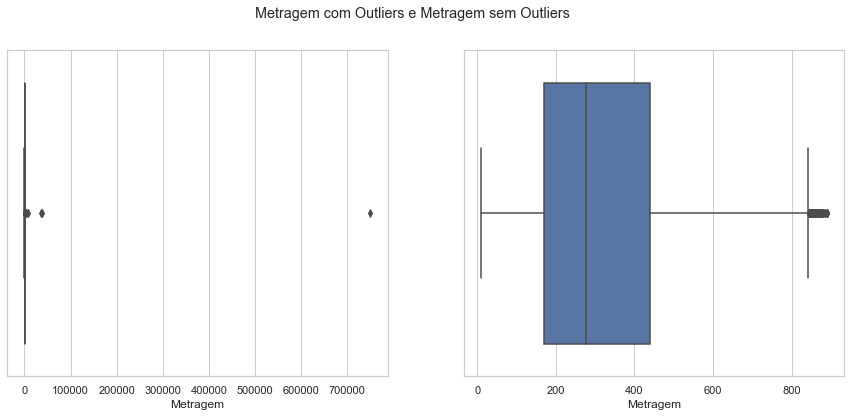

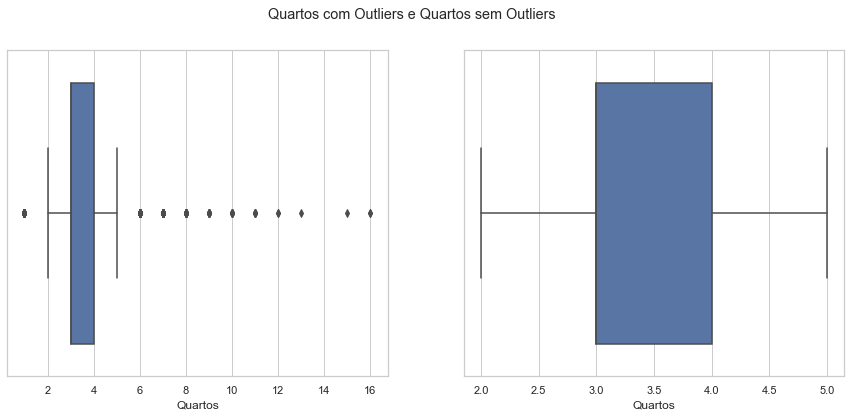

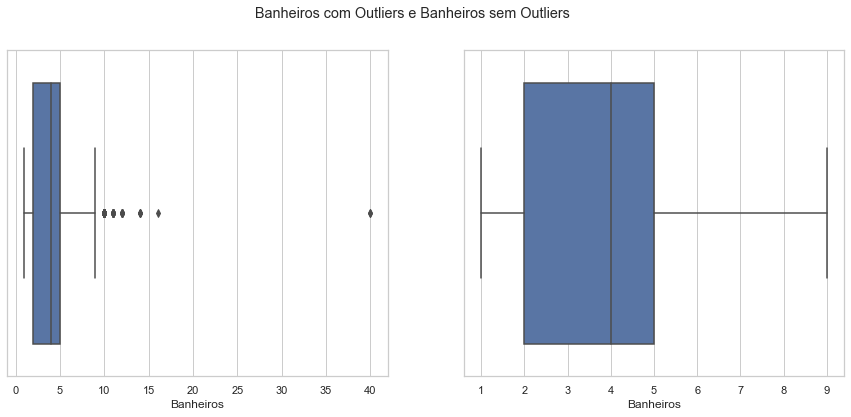

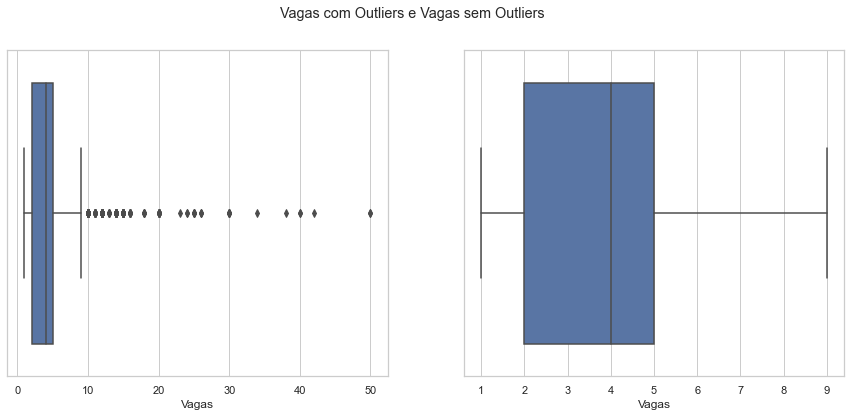

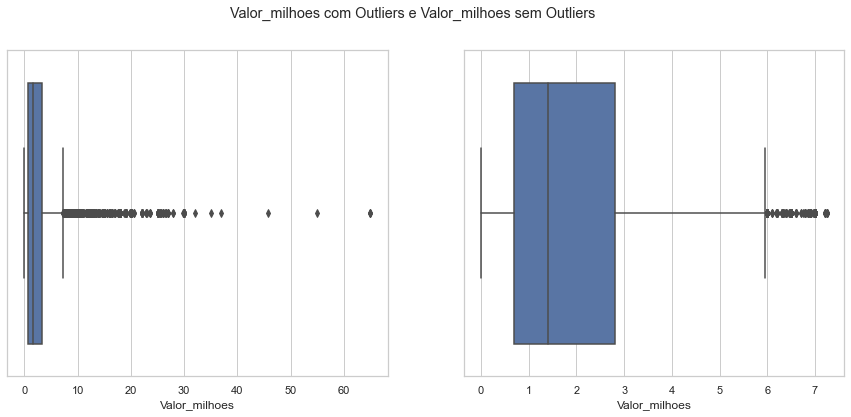

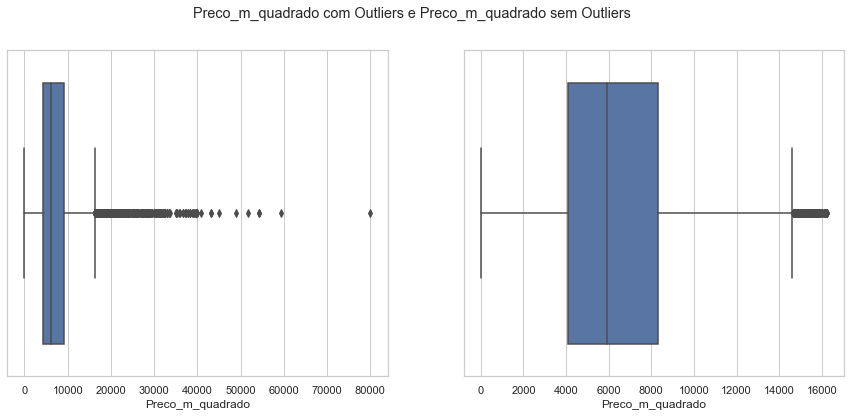

In [56]:
# Plotando gráficos BoxPlot das variáveis numéricas com Outliers e sem os Outliers:

for i in numericos:
  f, axes = plt.subplots(1, 2)
  f.suptitle(i + ' com Outliers e ' + i + ' sem Outliers')
  sns.boxplot(  x= i, data=dados, ax=axes[0])
  sns.boxplot(  x= i, data=dados_new, ax=axes[1])  

print()

A presença dos Outliers impacta significamente nos resultados e, é de suma importância sua identificação e se possivel, sua eliminação.